# Experimentación métodos iterativos

In [375]:
import numpy as np
import subprocess as sp
import matplotlib.pyplot as plt
import json
import os

dir_datos = "../data/sistemas"
dir_resultados = "../data/resultados"
dir_tiempos = "../data/tiempos"

if not os.path.exists(f"{dir_resultados}"):
    os.makedirs(f"{dir_resultados}")

if not os.path.exists(f"{dir_datos}"):
    os.makedirs(f"{dir_datos}")

if not os.path.exists(f"{dir_tiempos}"):
    os.makedirs(f"{dir_tiempos}")

## Funciones auxiliares

In [387]:
n = 10

def correr_algoritmo(tipo, tam, metodo, iteraciones=0, tol=0):        
    proceso = sp.run(["../src/iterativo", f"{dir_datos}/{tipo}_{tam}.txt", metodo, str(iteraciones), str(tol)], capture_output=True, text=True)
    proceso.check_returncode()

    return np.array(proceso.stdout.split(" "), dtype=np.float64)

def cargar_soluciones(xs):
    for i in range(2, n + 1):
        tam = 2 ** i
        xs.append(np.genfromtxt(f"{dir_datos}/x_{tam}.txt"))

def cargar_soluciones_metodos(metodo):
    with open(f"{dir_resultados}/{metodo}.json", "r") as input:
        return json.load(input)
    
def cargar_tiempos_metodos(metodo):
    with open(f"{dir_tiempos}/{metodo}.json", "r") as input:
        return json.load(input)
    
def guardar_resultados(data, metodo):
    with open(f"{dir_resultados}/{metodo}.json", "w") as output:
        json.dump(data, output)

def guardar_tiempos(data, metodo):
    with open(f"{dir_tiempos}/{metodo}.json", "w") as output:
        json.dump(data, output)

## Correr experimentos

In [422]:
max_iter = 450
step = 30
tolerancia = 1e-10

tipos = ["edd", "sim", "triang"]

## Soluciones de los métodos

In [379]:
def obtener_soluciones(dic, metodo):
    for tipo in tipos:
        dic[f"{tipo}"] = []
        for i in range(2, n + 1):
            if metodo != "LU":
                for j in range(1, max_iter + 1, step):
                    res = correr_algoritmo(tipo, 2 ** i, metodo, j, tolerancia)
                    dic[f"{tipo}"].append(res.tolist())
            else:
                res = correr_algoritmo(tipo, 2 ** i, metodo)
                dic[f"{tipo}"].append(res.tolist())

### Jacobi

In [380]:
resultados_jacobi = {}
obtener_soluciones(resultados_jacobi, "J")
guardar_resultados(resultados_jacobi, "jacobi")

### Jacobi Sumatoria

In [381]:
resultados_jacobi_sum = {}
obtener_soluciones(resultados_jacobi_sum, "JS")
guardar_resultados(resultados_jacobi_sum, "jacobi_sum")

### Gauss Seidel

In [382]:
resultados_gs = {}
obtener_soluciones(resultados_gs, "GS")
guardar_resultados(resultados_gs, "gauss-seidel")

### Gauss Seidel Sumatoria

In [383]:
resultados_gs_sum = {}
obtener_soluciones(resultados_gs_sum, "GSS")
guardar_resultados(resultados_gs_sum, "gauss-seidel_sum")

### LU

In [384]:
resultados_lu = {}
obtener_soluciones(resultados_lu, "LU")
guardar_resultados(resultados_lu, "lu")

## Cargar vectores solución

In [390]:
xs = []
cargar_soluciones(xs)

## Cargar soluciones métodos

In [391]:
sol_j = cargar_soluciones_metodos("jacobi")
sol_js = cargar_soluciones_metodos("jacobi_sum")
sol_gs = cargar_soluciones_metodos("gauss-seidel")
sol_gss = cargar_soluciones_metodos("gauss-seidel_sum")
sol_lu = cargar_soluciones_metodos("lu")


## Tiempo de cómputo para los métodos

In [396]:
def calcular_tiempos(dic, metodo):
    for tipo in tipos:
        dic[f"{tipo}"] = []
        for i in range(2, n + 1):
            t = %timeit -o correr_algoritmo(tipo, 2 ** i, metodo, max_iter, tolerancia)
            dic[f"{tipo}"].append([t.average, t.stdev])

In [397]:
tiempos_jacobi = {}
calcular_tiempos(tiempos_jacobi, "J")
guardar_tiempos(tiempos_jacobi, "jacobi")

3.16 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.33 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.34 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.13 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.37 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15 ms ± 585 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.5 ms ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
300 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.56 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.21 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.23 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.44 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.88 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.36 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.6 ms ± 171

In [398]:
tiempos_jacobi_sum = {}
calcular_tiempos(tiempos_jacobi_sum, "JS")
guardar_tiempos(tiempos_jacobi_sum, "jacobi_sum")

3.14 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.22 ms ± 98.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.51 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.82 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.1 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.8 ms ± 977 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
81.3 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
744 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.99 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.09 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.18 ms ± 89.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.34 ms ± 98.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.66 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.7 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.63 ms ± 394

In [399]:
tiempos_gs = {}
calcular_tiempos(tiempos_gs, "GS")
guardar_tiempos(tiempos_gs, "gauss-seidel")

3.19 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.2 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.27 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.76 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.7 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.8 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
139 ms ± 3.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
683 ms ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.31 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.37 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.62 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.38 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.54 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.1 ms ± 488 

In [400]:
tiempos_gss = {}
calcular_tiempos(tiempos_gss, "GSS")
guardar_tiempos(tiempos_gss, "gauss-seidel_sum")

3.16 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.28 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.36 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.62 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.81 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.25 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.8 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
89.4 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
413 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.22 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.51 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.59 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.42 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.59 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.3 ms ± 

In [401]:
tiempos_lu = {}
calcular_tiempos(tiempos_lu, "LU")
guardar_tiempos(tiempos_gs, "lu")

3.19 ms ± 89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.15 ms ± 85 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.3 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.69 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.64 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.85 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
74.8 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
292 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.25 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.23 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.35 ms ± 55.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.61 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.65 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.1 ms ± 301 µ

## Generación de Gráficos

### Error

In [392]:
jacobi_separados = {}
gs_separados = {}
jacobi_sum_separados = {}
gs_sum_separados = {}

# separamos los resultados por tamaño de matriz
for tipo in tipos:
    jacobi_separados[f"{tipo}"] = {}
    gs_separados[f"{tipo}"]  = {}
    jacobi_sum_separados[f"{tipo}"]  = {}
    gs_sum_separados[f"{tipo}"]  = {}
    for i in range(2, n+1):
        jacobi_separados[f"{tipo}"][f"{2**i}"] = []
        gs_separados[f"{tipo}"][f"{2**i}"]  = []
        jacobi_sum_separados[f"{tipo}"][f"{2**i}"]  = []
        gs_sum_separados[f"{tipo}"][f"{2**i}"]  = []
        for sol in sol_j[f"{tipo}"]:
            if len(sol) == 2**i:
                jacobi_separados[f"{tipo}"][f"{2**i}"].append(sol)
        for sol in sol_gs[f"{tipo}"]:
            if len(sol) == 2**i:
                gs_separados[f"{tipo}"][f"{2**i}"].append(sol)
        for sol in sol_js[f"{tipo}"]:
            if len(sol) == 2**i:
                jacobi_sum_separados[f"{tipo}"][f"{2**i}"].append(sol)
        for sol in sol_gss[f"{tipo}"]:
            if len(sol) == 2**i:
                gs_sum_separados[f"{tipo}"][f"{2**i}"].append(sol)
                
errores_jacobi = {}
errores_gs = {}
errores_jacobi_sum = {}
errores_gs_sum = {}

for tipo in tipos:
    errores_jacobi[f"{tipo}"] = {}
    errores_gs[f"{tipo}"] = {}
    errores_jacobi_sum[f"{tipo}"] = {}
    errores_gs_sum[f"{tipo}"] = {}
    for sol in xs:
        errores_jacobi[f"{tipo}"][f"{len(sol)}"] = []
        errores_gs[f"{tipo}"][f"{len(sol)}"] = []
        errores_jacobi_sum[f"{tipo}"][f"{len(sol)}"] = []
        errores_gs_sum[f"{tipo}"][f"{len(sol)}"] = []

        for x in jacobi_separados[f"{tipo}"][f"{len(sol)}"]:
            errores_jacobi[f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
        for x in gs_separados[f"{tipo}"][f"{len(sol)}"]:
            errores_gs[f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
        for x in jacobi_sum_separados[f"{tipo}"][f"{len(sol)}"]:
            errores_jacobi_sum[f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
        for x in gs_sum_separados[f"{tipo}"][f"{len(sol)}"]:
            errores_gs_sum[f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))

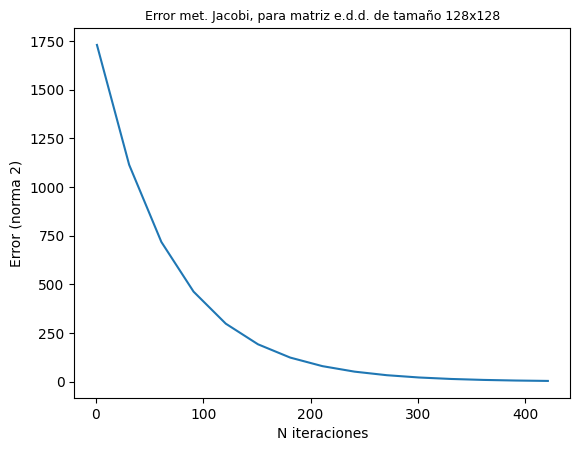

In [394]:
tam = 128
tipo = "edd"
errs = errores_jacobi[f"{tipo}"][f"{tam}"]

its = range(1,max_iter + 1,step)

plt.plot(its, errs)
plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title(f"Error met. Jacobi, para matriz e.d.d. de tamaño {tam}x{tam}",fontsize = 9)
plt.show()

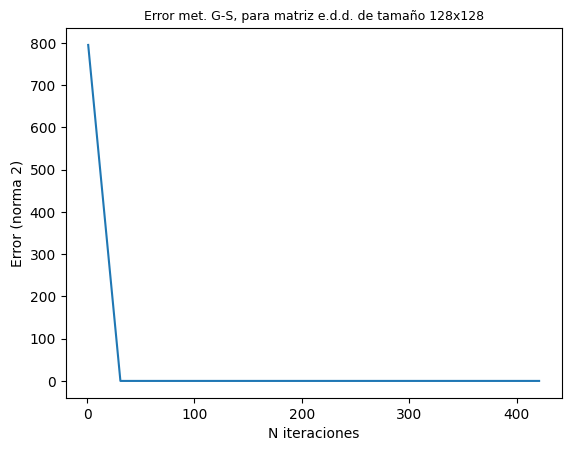

In [416]:
tam = 128
tipo = "edd"
errs = errores_gs[f"{tipo}"][f"{tam}"]

its = range(1,max_iter + 1,step)

plt.plot(its, errs)
plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title(f"Error met. G-S, para matriz e.d.d. de tamaño {tam}x{tam}",fontsize = 9)
plt.show()

### Tiempo de cómputo

In [423]:
tiempos_j = cargar_tiempos_metodos("jacobi")
tiempos_js = cargar_tiempos_metodos("jacobi_sum")
tiempos_gs = cargar_tiempos_metodos("gauss-seidel")
tiempos_gss = cargar_tiempos_metodos("gauss-seidel_sum")
tiempos_lu = cargar_tiempos_metodos("lu")

In [424]:
tam_matriz = [2 ** i for i in range(2, n + 1)]
algoritmos = ["Jacobi", "Jacobi Sum", "Gauss-Seidel", "Gauss-Seidel Sum"]
nombre_tipos = { "edd": "Estrictamente diagonal dominante", "sim": "Simétrica", "triang": "Triangular inferior"}

def graficar_tiempos(tipo):
    _, ax = plt.subplots()
    
    jacobi = np.array([tiempo[0] for tiempo in tiempos_j[tipo]])
    jacobi_d = np.array([tiempo[1] for tiempo in tiempos_j[tipo]])
    jacobi_sum = np.array([tiempo[0] for tiempo in tiempos_js[tipo]])
    jacobi_sum_d = np.array([tiempo[1] for tiempo in tiempos_js[tipo]])
    gs = np.array([tiempo[0] for tiempo in tiempos_gs[tipo]])
    gs_d = np.array([tiempo[1] for tiempo in tiempos_gs[tipo]])
    gss = np.array([tiempo[0] for tiempo in tiempos_gss[tipo]])
    gss_d = np.array([tiempo[1] for tiempo in tiempos_gss[tipo]])

    ax.plot(tam_matriz, jacobi)
    ax.plot(tam_matriz, jacobi_sum)
    ax.plot(tam_matriz, gs)
    ax.plot(tam_matriz, gss)

    ax.fill_between(tam_matriz, jacobi - jacobi_d, jacobi + jacobi_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi_sum - jacobi_sum_d, jacobi_sum + jacobi_sum_d, alpha=0.3)
    ax.fill_between(tam_matriz, gs - gs_d, gs + gs_d, alpha=0.3)
    ax.fill_between(tam_matriz, gss - gss_d, gss + gss_d, alpha=0.3)

    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title(f"{nombre_tipos[tipo]}")
    ax.legend(algoritmos)
    
    plt.show()

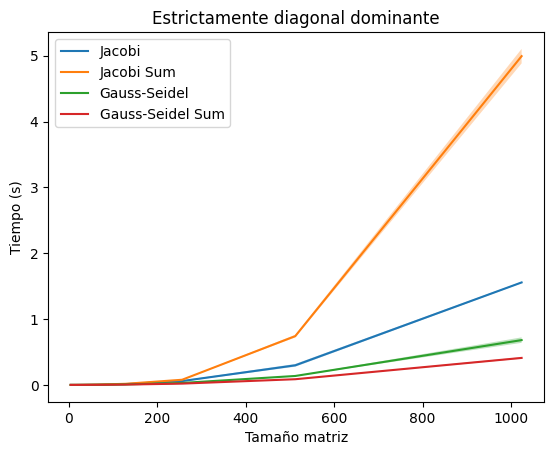

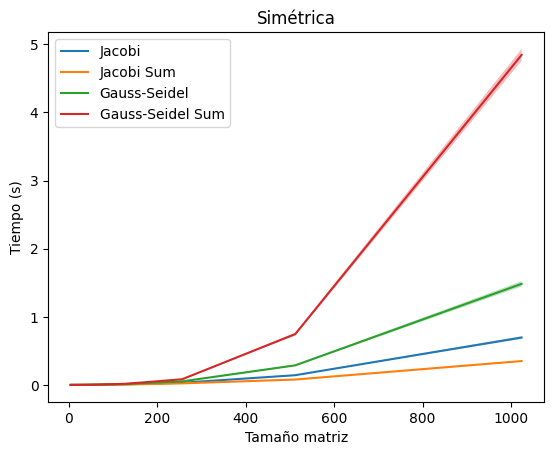

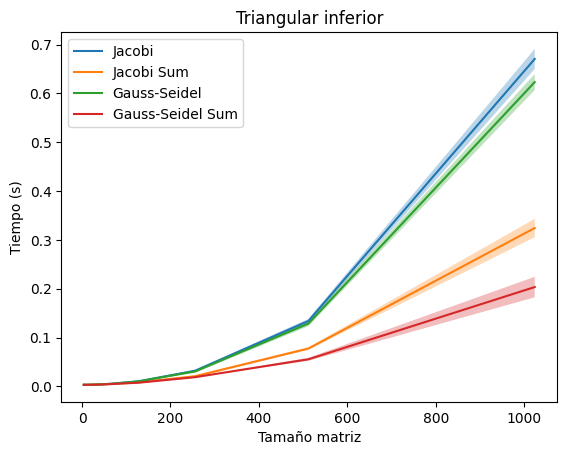

(None, None, None)

In [425]:
graficar_tiempos("edd"), graficar_tiempos("sim"), graficar_tiempos("triang")

### LU

In [426]:
tam_matriz = [2 ** i for i in range(2, n + 1)]

def graficar_lu():
    _, ax = plt.subplots()
    for tipo in tipos:
        lu = np.array([tiempo[0] for tiempo in tiempos_lu[tipo]])
        ax.plot(tam_matriz, lu)
    
    for tipo in tipos:
        lu = np.array([tiempo[0] for tiempo in tiempos_lu[tipo]])
        lu_d = np.array([tiempo[1] for tiempo in tiempos_lu[tipo]])
        ax.fill_between(tam_matriz, lu - lu_d, lu + lu_d, alpha=0.3)
    
    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title("Factorización LU")
    ax.legend(tipos)

    plt.show()


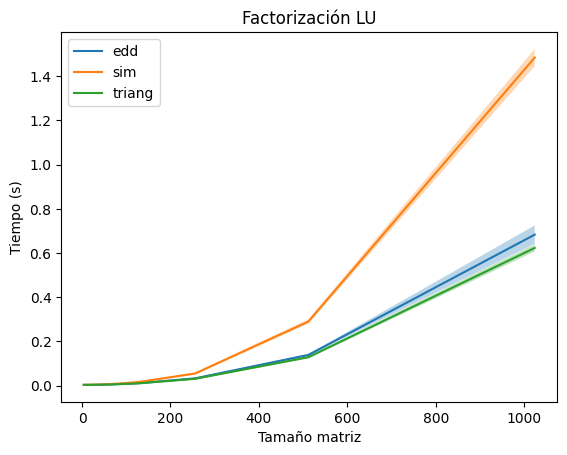

In [427]:
graficar_lu()

### LU vs Métodos Iterativos

In [428]:
tam_matriz = [2 ** i for i in range(2, n + 1)]
tipos = ["LU", "Jacobi", "Jacobi Sum", "Gauss-Seidel", "Gauss-Seidel Sum"]

def graficar_vs():
    _, ax = plt.subplots()

    lu = np.array([tiempo[0] for tiempo in tiempos_lu["edd"]])
    lu_d = np.array([tiempo[1] for tiempo in tiempos_lu["edd"]])
    jacobi = np.array([tiempo[0] for tiempo in tiempos_j["edd"]])
    jacobi_d = np.array([tiempo[1] for tiempo in tiempos_j["edd"]])
    jacobi_sum = np.array([tiempo[0] for tiempo in tiempos_js["edd"]])
    jacobi_sum_d = np.array([tiempo[1] for tiempo in tiempos_js["edd"]])
    gs = np.array([tiempo[0] for tiempo in tiempos_gs["edd"]])
    gs_d = np.array([tiempo[1] for tiempo in tiempos_gs["edd"]])
    gss = np.array([tiempo[0] for tiempo in tiempos_gss["edd"]])
    gss_d = np.array([tiempo[1] for tiempo in tiempos_gss["edd"]])

    ax.plot(tam_matriz, lu)
    ax.plot(tam_matriz, jacobi)
    ax.plot(tam_matriz, jacobi_sum)
    ax.plot(tam_matriz, gs)
    ax.plot(tam_matriz, gss)

    ax.fill_between(tam_matriz, lu - lu_d, lu + lu_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi - jacobi_d, jacobi + jacobi_d, alpha=0.3)
    ax.fill_between(tam_matriz, jacobi_sum - jacobi_sum_d, jacobi_sum + jacobi_sum_d, alpha=0.3)
    ax.fill_between(tam_matriz, gs - gs_d, gs + gs_d, alpha=0.3)
    ax.fill_between(tam_matriz, gss - gss_d, gss + gss_d, alpha=0.3)
    
    
    ax.set_ylabel("Tiempo (s)")
    ax.set_xlabel("Tamaño matriz")
    ax.set_title("Factorización LU vs Iterativos (edd)")
    ax.legend(tipos)

    plt.show()

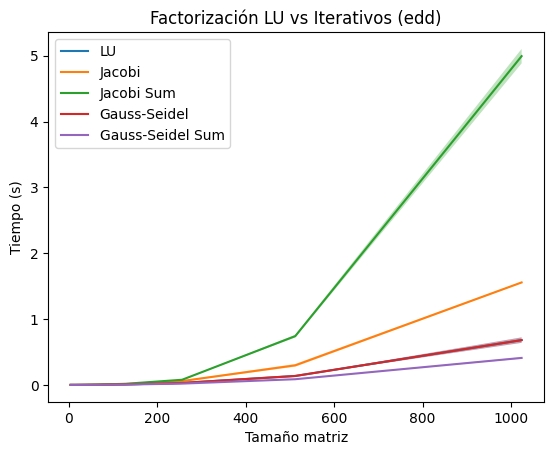

In [429]:
graficar_vs()